# AE 370 Project 1 - A Numerical Method for a Dynamical System
  
**Group Members:**  
- Elijah Lewis 
- Raghav Mansharamani
- Matthew Greenstein
- Jackson Rees

---

## Project Overview
In this project, we investigate an engineering-relevant dynamical system and apply a numerical method to explore its behavior.  

The problem we chose was...

---

## Repository Structure

```text
AE_370_Project_1/
│
├── source/
│   ├── reactions.py          # ODEs and reaction kinetics
│   ├── numerical_methods.py  # Integration algorithms (RK4, AB3)
│   ├── convergence_tests.py  # Error and stability validation
│   └── plotting_utils.py     # Visualization and post-processing
│
├── main.ipynb                # Main notebook (this file)
├── data/                     # Initial condition files
├── results/                  # Generated plots and figures
├── README.md
├── project_requirements.pdf
├── requirements.txt
└── .gitignore
```

---
## Acknowledgements

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Import functions
from source.reactions import methane_combustion
from source.numerical_methods import euler_forward
from source.convergence_tests import *
from source.plotting_utils import *


# Import initial conditions
from data.initial_conditions import methane_conditions

# Defining the Dynamical System

---

## Methane-Oxygen Combustion

Methane–oxygen combustion is a fundamental reaction that powers everything from household stoves to rocket engines. The process converts chemical energy into heat through a highly nonlinear set of coupled reactions between methane (CH₄) and oxygen (O₂), producing carbon dioxide and water. Because combustion involves fast, temperature-dependent reaction rates and competing forward and reverse reactions, it can be modeled as a dynamical system of ordinary differential equations (ODEs) that describe the time evolution of species concentrations. This makes it ideal for AE 370 Project 1, where the objective is to analyze an engineering-relevant dynamical system using an appropriate numerical method. By simulating methane–oxygen kinetics, we can explore stability, stiffness, and convergence properties of time-integration schemes, providing both physical insight into combustion dynamics and a rigorous test case for evaluating numerical accuracy and efficiency.


## Reversible Reaction ODEs

Consider the reversible reaction: ${A + B \leftrightharpoons C + D}$ with forward and reverse rate constants $k_f$ and $k_r$.

### Mass-action rate laws
Forward rate: $r_f = k_f [A][B]$

Reverse rate: $r_r = k_r [C][D]$

### Differential equations


\begin{aligned}
\frac{d[A]}{dt} &= -k_f [A][B] + k_r [C][D], \\[4pt]
\frac{d[B]}{dt} &= -k_f [A][B] + k_r [C][D], \\[4pt]
\frac{d[C]}{dt} &= +k_f [A][B] - k_r [C][D], \\[4pt]
\frac{d[D]}{dt} &= +k_f [A][B] - k_r [C][D].
\end{aligned}

### Physical Interpretation

For methane–oxygen combustion, the overall reaction is:

$$\text{CH}_4 + 2\text{O}_2 \rightarrow \text{CO}_2 + 2\text{H}_2\text{O}.$$

In practice, this process occurs through many intermediate reactions (CH₄ → CH₃ → CO → CO₂, etc.).
To keep the system manageable, we model a simplified reaction that still maintains the overall stoichiometry:

$$\text{CH}_4 + 2\text{O}_2 \leftrightharpoons \text{CO}_2 + 2\text{H}_2\text{O},$$

where $k_f$ and $k_r$ represent the combined kinetics of oxidation and recombination.  
This abstraction preserves the essential nonlinear coupling between reactant and product concentrations, making it an ideal reduced-order dynamical system for numerical experimentation.



In [2]:
# Initial Conditions
u0 = methane_conditions.u0
species = methane_conditions.species
kf = methane_conditions.kf
kr = methane_conditions.kr

print('Initial Conditions:')
for i, s in enumerate(species):
    print(f'{s}: {u0[i]}')

print()
print('Constants:')
print(f'Forward rate (kf): {kf}')
print(f'Reverse rate (kr): {kr}')

Initial Conditions:
CH4: 1.0
O2: 2.0
CO2: 0.0
H2O: 0.0

Constants:
Forward rate (kf): 5.0
Reverse rate (kr): 0.1


In [5]:
t, u = euler_forward(methane_combustion, methane_conditions.u0, dt=0.001, t_final=10.0)

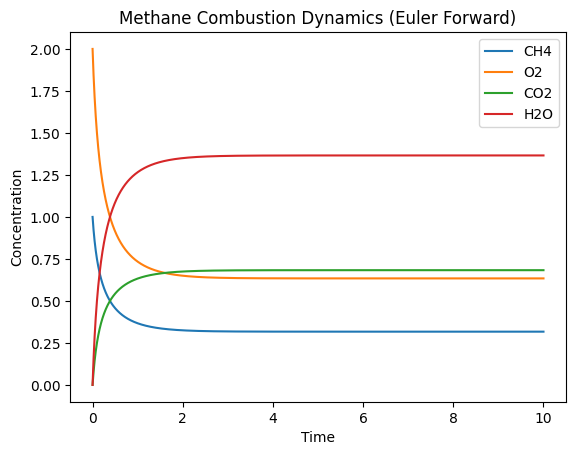

In [6]:
import matplotlib.pyplot as plt

plt.plot(t, u)
plt.legend(methane_conditions.species)
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("Methane Combustion Dynamics (Euler Forward)")
plt.show()
